# **MÓDULO 14 - Exercício**
# Pré Processamento dos Dados - A primeira etapa Pré Modelagem

Para nossa atividade usaremos uma base de churn também, porém essa base não diz respeito a serviços bancários e sim serviços de internet, telefone e tv - Telecomunicação.

Vamos realizar aqui as etapas de limpeza e tratamento de dados vistos durante a aula, porém aplicados a essa base nova.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("Dados/CHURN_TELECON_MOD08_TAREFA.csv", delimiter=';')

df.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN


Legenda dos dados:

*   **CustomerID** : Esse é o ID único de cada cliente nosso da rede de produtos de telecomunicação.

*   **Genero** : O genero dos nossos clientes.

*   **Idoso** : Se nosso cliente tem acima de 60 anos ou não. (Sim = 1 | Não = 0)

*   **Casado** : Se nosso cliente é casado ou não.

*   **Dependents** : Se cliente tem dependentes.

*   **Tempo_como_Cliente** : Tempo em meses que nosso cliente está com a nossa empresa.

*   **PhoneService** : Se ele contratou serviço telefônico com a nossa empresa.

*   **Servico_Internet** : Qual o tipo de serviço de internet contratado.

*   **Servico_Seguranca** : Se ele contratou serviço de segurança com a nossa empresa.

*   **Suporte_Tecnico** : Se já acionou o suporte técnico.

*   **StreamingTV** : Se ele contratou serviço de streaming para TV.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **PaymentMethod** : Forma de Pagamento.

*   **Pagamento_Mensal** : Quanto o cliente pagava mensalmente.

*   **Total_Pago** : Total já pago pelo cliente para nossa companhia.

*   **Churn** : Nossa coluna mais importante, se nosso cliente nos abandonou ou não.




# 1 - Carregue a base, verifique se os tipos de dados estão de acordo com cada coluna e caso não estejam realize a transformação dos tipos de dados.

In [7]:
#seu código aqui
df.dtypes



customerID                str
Genero                    str
Idoso                   int64
Casado                    str
Dependents                str
Tempo_como_Cliente      int64
PhoneService              str
Servico_Internet          str
Servico_Seguranca         str
Suporte_Tecnico           str
StreamingTV               str
Tipo_Contrato             str
PaymentMethod             str
Pagamento_Mensal      float64
Total_Pago            float64
Churn                     str
dtype: object

Aparentemente tudo ok


# 2 - Esse exercício faremos por etapas:
A) Verifique se temos colunas com dados faltantes e traga a % dos dados faltantes por coluna.

In [19]:
#seu código aqui
valores_nulos = df.isnull().sum()
quantidade_registros = len(df)

percentual_nulos = ((valores_nulos / quantidade_registros) * 100).sort_values(ascending = False)
print(percentual_nulos)

PhoneService          59.28
Pagamento_Mensal      13.00
Genero                 0.48
Churn                  0.20
Casado                 0.00
Dependents             0.00
Idoso                  0.00
customerID             0.00
Servico_Internet       0.00
Tempo_como_Cliente     0.00
Servico_Seguranca      0.00
Suporte_Tecnico        0.00
Tipo_Contrato          0.00
StreamingTV            0.00
PaymentMethod          0.00
Total_Pago             0.00
dtype: float64


B) Exclua nessa etapa as linhas das colunas com dados faltantes que você analisar que esse método é o ideal. Justifique o motivo de estar excluindo essas linhas.

Vou excluir os registros nulos da coluna de Genero e Churn, por conta da representatividade de registros nulos ser menor que 0.5% dos dados

In [30]:
#seu código aqui
# QUANTIDADE DE REGISTROS NULOS COLUNA GÊNERO
quantidade_registros = len(df)
quantidade_nulos_genero = df['Genero'].isnull().sum()

# COLUNA CHURN
quantidade_nulos_churn = df['Churn'].isnull().sum()

print(f'COLUNA GÊNERO\n\nA coluna possui: {quantidade_registros} registros\nSendo: {quantidade_nulos_genero} nulos')
print(f'\nCOLUNA CHURN\n\nA coluna possui: {quantidade_registros} registros\nSendo: {quantidade_nulos_churn} nulos')



COLUNA GÊNERO

A coluna possui: 2500 registros
Sendo: 12 nulos

COLUNA CHURN

A coluna possui: 2500 registros
Sendo: 5 nulos


In [39]:
# EXCLUINDO OS REGISTROS NULOS
df.dropna(subset = ['Genero'], inplace = True)
df.dropna(subset = ['Churn'], inplace = True)

# VERIFICANDO SE DEU CERTO
df[['Genero', 'Churn']].isnull().sum()

Genero    0
Churn     0
dtype: int64

C) Nessa etapa substitua pela média, mediana ou moda as linhas das colunas com valores faltantes que você analisou e entendeu que esse era o melhor método. Não se esqueça de justificar sua escolha.

**Dica variáveis numéricas:** Não se esqueça de verificar a distrbuição dos dados, média e mediana.

**Dica variáveis categóricas:** Caso precise substituir uma variável categórica utilize um gráfico de barras para verificar a que mais aparece e utilizar ela na substituição.
Ou você pode optar por excluir a coluna, mas justifique sua escolha.

Caso opte por substituir você pode utilizar a função fillna:
df['SUACOLUNA'].fillna("VALOR QUE SUBSTITUIRA O NULO", inplace=True)
Ela funcionará como a replace.

Coluna PhoneService

In [49]:
#seu código aqui
# VERIFICANDO OS REGISTROS DA COLUNA PHONESERVICE
print(f'{df['PhoneService'].value_counts()}\n')
quantidade_nulos_phone = df['PhoneService'].isnull().sum()
qtd_registros_nao_nulos = df['PhoneService'].notnull().sum()

print(f'A coluna possui: {qtd_registros_nao_nulos} registros não nulos')
print(f'A coluna possui: {quantidade_nulos_phone} registros nulos\n')

PhoneService
Yes    920
No      86
Name: count, dtype: int64

A coluna possui: 1006 registros não nulos
A coluna possui: 1482 registros nulos



Após analisar a distribuição dos valores da coluna PhoneService, entendo que não seria possível realizar a substituição dos valores nulos pelos seguintes métodos:
- **Moda** ---> 92% dos registros são "Sim", portanto, a concentração seria ainda mais intensificada.
- **Inserir de forma aleatória ou seguindo a proporção de 92% a 8%** ---> Entendo que seria inserir valores que não condizem com a realidade da empresa e consequentemente iria impactar na precisão da análise do modelo.
- **Inserir os valores nulos como "Não"** ---> A lógica é a mesma citada acima, iria desequilibrar a distribuição da coluna e impactar na precisão do modelo.
- **Inserir um novo valor, ex: "Desconhecido"** ---> Nesse caso, não vejo sentido incluir um novo valor para essa coluna, já que não condiz com o objetivo da análise.

Em vista que essa coluna não é a principal da nossa análise e que 59% dos seus registros são nulos, **eu prefiro excluir essa coluna** para evitar enviesamento dos dados.

In [142]:
df.drop(columns = ['PhoneService'], inplace = True)
df.head(3)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes


Coluna Pagamento Mensal

In [140]:
# REGISTROS NULOS
total_registros = df['Pagamento_Mensal'].notnull().sum()
registros_nulos = df['Pagamento_Mensal'].isnull().sum()
print(f'TOTAL REGISTROS: {total_registros}')
print(f'TOTAL REGISTROS NULOS: {registros_nulos}\n')

# VENDO AS MEDIDAS DE CENTRALIDADE
medidas_centralidade = df['Pagamento_Mensal'].describe().round(2)
print(f'MEDIDAS DE CENTRALIDADE\n{medidas_centralidade}', )


TOTAL REGISTROS: 2175
TOTAL REGISTROS NULOS: 313

MEDIDAS DE CENTRALIDADE
count    2175.00
mean       65.61
std        29.93
min        18.40
25%        39.50
50%        71.45
75%        90.25
max       118.65
Name: Pagamento_Mensal, dtype: float64


Verificando se há outliers...

<Axes: ylabel='Pagamento_Mensal'>

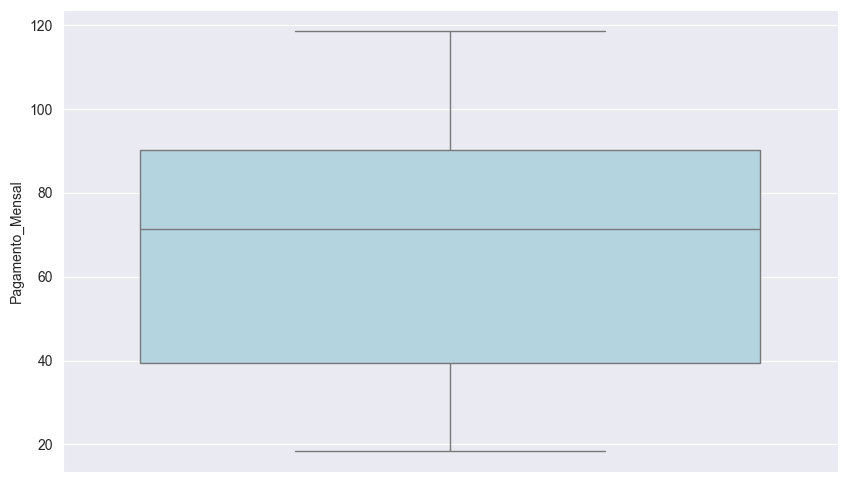

In [75]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df['Pagamento_Mensal'], color = 'Lightblue')

Analisando a distribuição dos dados...

Text(0, 0.5, 'Quantidade Registros')

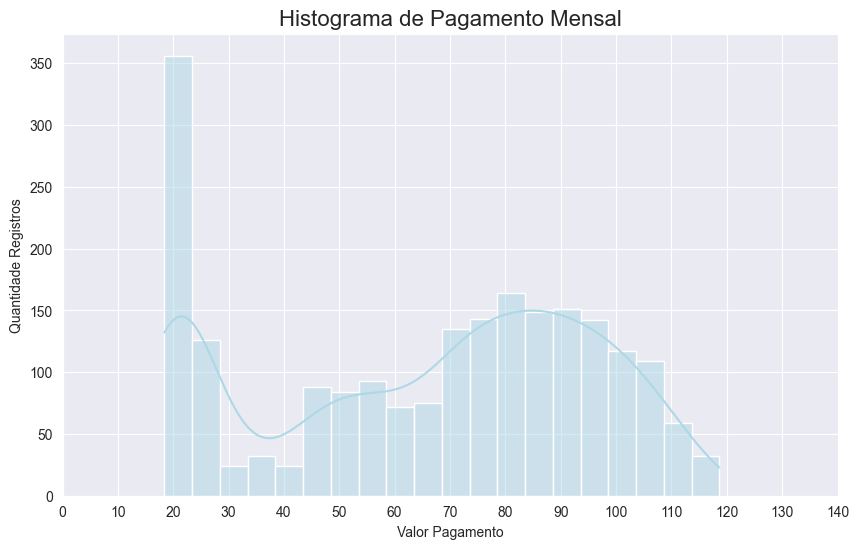

In [72]:
plt.figure(figsize = (10, 6))
sns.histplot(data = df['Pagamento_Mensal'], bins = 20, kde = True, color = 'Lightblue')
plt.title("Histograma de Pagamento Mensal", fontsize = 16)
plt.xticks(range(0, 150, 10))
plt.xlabel('Pagamento Mensal')
plt.xlabel("Valor Pagamento")
plt.ylabel("Quantidade Registros")

In [127]:
# CALCULANDO O VALOR MÉDIO DA COLUNA
media = df['Pagamento_Mensal'].mean()

# REGISTROS ABAIXO DA MÉDIA
registros_menor_media = df[df['Pagamento_Mensal'] < media].count()
total_registros_menor_media = registros_menor_media['Pagamento_Mensal']

# REGISTROS ACIMA DA MÉDIA
registros_maior_media = df[df['Pagamento_Mensal'] > media].count()
total_registros_maior_media = registros_maior_media['Pagamento_Mensal']

# CALCULANDO A REPRESENTATIVIDADE DE CADA
percentual_maior_media = round((total_registros_maior_media / total_registros) * 100, 1)
percentual_menor_media = round((total_registros_menor_media / total_registros) * 100, 1)

print(f'TOTAL REGISTROS: {total_registros}\n')
print(f'TOTAL REGISTROS MAIOR QUE A MÉDIA: {total_registros_maior_media} ---> {percentual_maior_media}%')
print(f'TOTAL REGISTROS MENOR QUE A MÉDIA: {total_registros_menor_media} ---> {percentual_menor_media}%')

TOTAL REGISTROS: 2175

TOTAL REGISTROS MAIOR QUE A MÉDIA: 1224 ---> 56.3%
TOTAL REGISTROS MENOR QUE A MÉDIA: 951 ---> 43.7%


Em vista que 56% dos valores dos registros da coluna Pagamento_Mensal são acima da média, prefiro por **substituir os valores nulos pela mediana da coluna**

In [141]:
# CALCULANDO A MEDIANA
mediana = df['Pagamento_Mensal'].median()

# SUBSTITUINDO OS VALORES NULOS PELA MEDIANA
df['Pagamento_Mensal'] = df['Pagamento_Mensal'].fillna(mediana)

# VERIFICANDO SE DEU CERTO
df['Pagamento_Mensal'].isnull().sum()

np.int64(0)

Verificando se há algum valor nulo...

In [168]:
df.isnull().sum()

customerID            0
Genero                0
Idoso                 0
Casado                0
Dependents            0
Tempo_como_Cliente    0
Servico_Internet      0
Servico_Seguranca     0
Suporte_Tecnico       0
StreamingTV           0
Tipo_Contrato         0
PaymentMethod         0
Pagamento_Mensal      0
Total_Pago            0
Churn                 0
dtype: int64

# 3 - Verifique se encontramos valores digitados incorretamente, ou com letras maiusculas ou minusculas, ou até mesmo mesmos valores porém escritos de forma dirente e corrija.

In [143]:
df.head(1)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No


In [166]:
#seu código aqui
# VERIFICANDO A COLUNA DE GÊNERO
genero = df['Genero'].value_counts()
print(genero)

# VERIFICANDO A COLUNA CASADO
casado = df['Casado'].value_counts()
print(f'\n{casado}')

# VERIFICANDO A COLUNA DE DEPENDENTS
dependents = df['Dependents'].value_counts()
print(f'\n{dependents}')

servico_internet = df['Servico_Internet'].value_counts()
print(f'\n{servico_internet}')

servico_seguranca = df['Servico_Seguranca'].value_counts()
print(f'\n{servico_seguranca}')

suporte_tecnico = df['Suporte_Tecnico'].value_counts()
print(f'\n{suporte_tecnico}')

streaming = df['StreamingTV'].value_counts()
print(f'\n{streaming}')

tipo_contrato = df['Tipo_Contrato'].value_counts()
print(f'\n{tipo_contrato}')

payment = df['PaymentMethod'].value_counts()
print(f'\n{payment}')

churn = df['Churn'].value_counts()
print(f'\n{churn}')


Genero
Male      1265
Female    1212
M            4
f            4
F            3
Name: count, dtype: int64

Casado
No     1262
Yes    1226
Name: count, dtype: int64

Dependents
No     1705
Yes     783
Name: count, dtype: int64

Servico_Internet
Fiber optic    1119
DSL             835
No              527
dsl               7
Name: count, dtype: int64

Servico_Seguranca
No                     1254
Yes                     707
No internet service     527
Name: count, dtype: int64

Suporte_Tecnico
No                     1250
Yes                     711
No internet service     527
Name: count, dtype: int64

StreamingTV
No                     1001
Yes                     960
No internet service     527
Name: count, dtype: int64

Tipo_Contrato
Month-to-month    1369
Two year           602
One year           517
Name: count, dtype: int64

PaymentMethod
Electronic check             830
Bank transfer (automatic)    579
Credit card (automatic)      551
Mailed check                 528
Name: count,

Corrigindo os erros...

In [167]:
df['Genero'] = df['Genero'].replace({'M': 'Male', 'F': 'Female', 'f': 'Female'})
df['Servico_Internet'] = df['Servico_Internet'].str.upper()

print(df['Servico_Internet'].unique())
print(df['Genero'].unique())

<StringArray>
['DSL', 'NO', 'FIBER OPTIC']
Length: 3, dtype: str
<StringArray>
['Female', 'Male']
Length: 2, dtype: str


# [EXTRA] 4 - Caso deseje, para manter um padrão na sua base, renomeie as colunas ou deixando em português, ou inglês.

In [171]:
# REMOVENDO A COLUNA DE CUSTOMERID
df.drop(columns = ['customerID'], inplace = True)

# RENOMEANDO AS COLUNAS
df.rename(columns = {'Dependents': 'Dependentes', 'PaymentMethod': 'Metodo_Pagamento'}, inplace = True)
df.head(5)


,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,Metodo_Pagamento,Pagamento_Mensal,Total_Pago,Churn
0,Female,0,Yes,No,1,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,DSL,Yes,Yes,No,One year,Bank transfer (automatic),71.45,1840.75,No
16,Female,0,No,No,52,NO,No internet service,No internet service,No internet service,One year,Mailed check,71.45,1022.95,No


### SALVANDO O DATAFRAME

In [175]:
df.to_csv('Dados/CHURN_TELECON_MOD08_TAREFA_TRATADO.csv', index = False)
novo_df = pd.read_csv('Dados/CHURN_TELECON_MOD08_TAREFA_TRATADO.csv')
novo_df.head()

,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,Metodo_Pagamento,Pagamento_Mensal,Total_Pago,Churn
0,Female,0,Yes,No,1,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,DSL,Yes,Yes,No,One year,Bank transfer (automatic),71.45,1840.75,No
4,Female,0,No,No,52,NO,No internet service,No internet service,No internet service,One year,Mailed check,71.45,1022.95,No
